In [2]:
import numpy as np
import matplotlib.pyplot as plt

import math
import timeit
import os

import tensorflow as tf
from tensorflow import keras

import cv2
import scipy
import skimage

%matplotlib inline

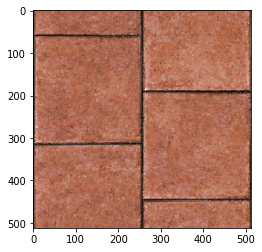

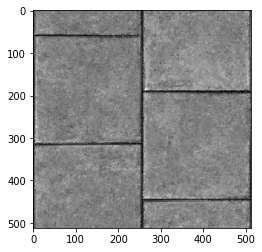

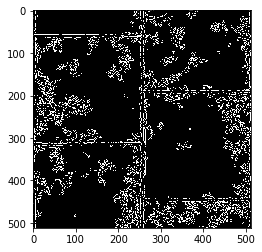

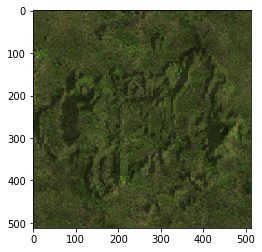

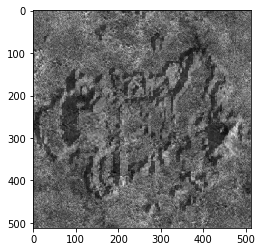

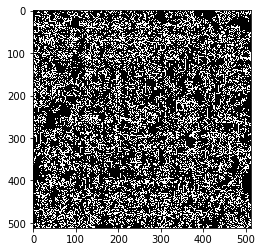

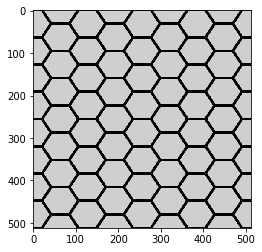

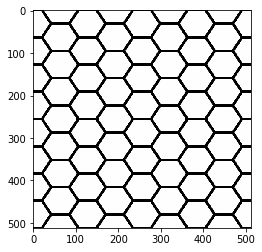

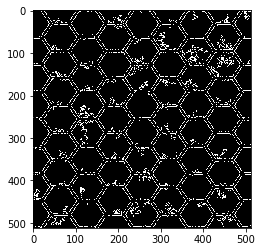

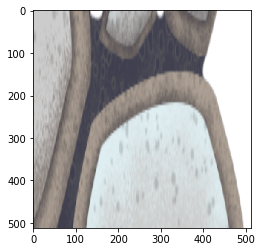

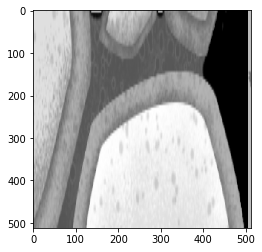

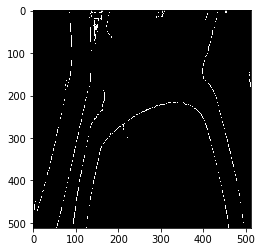

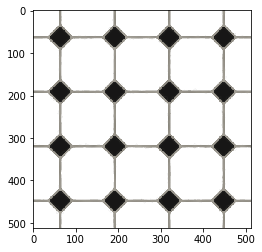

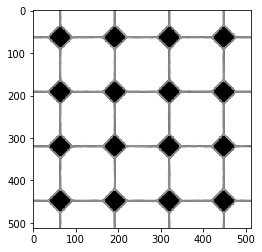

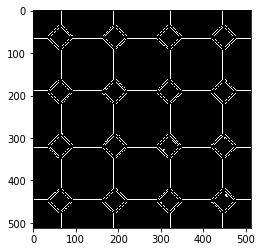

In [2]:
showSome = True #False
countSome = 0

for file in os.listdir("data/NoAugmentDataset"):
    filename = "data/NoAugmentDataset/" + file
    I = plt.imread(filename)
    
    #convert to float data type and scale to [0..1] if necessary
    if (I.dtype == np.uint8):
        I = I.astype(float) / 256
    I = cv2.resize(I, (512,512))
    
    if ((showSome) and (countSome % 100 == 0)):
        plt.imshow(I)
        plt.show()
    
    #if your image is color (shape HxWx3), convert to grayscale by averaging together 
    I2 = np.average(I, axis=-1)
    I2 = cv2.resize(I2, (512,512))
    
    if ((showSome) and (countSome % 100 == 0)):
        plt.imshow(I2, cmap=plt.cm.gray)
        plt.show()
    
    #Canny Edge Detection
    #Image needs to be converted back to uint8 for edge detection
    #threshold 0 and 1 are used to determine how edge linking and detecting edges is done 
    #(play around with the thresholds to find better results perhaps)
    #L2gradient means sqrt(dx^2 + dy^1) for L2norm/magnitude of the gradient
    I3 = (I2*255).astype(np.uint8)
    I3 = cv2.Canny(image=I3, threshold1=0, threshold2=100, L2gradient=True)
    
    if ((showSome) and (countSome % 100 == 0)):
        plt.imshow(I3, cmap=plt.cm.gray)
        plt.show()
        
    countSome += 1

In [63]:
#Test one file- generate 99 more images
#Each image will have this algorithm run on it below

#Change to a single image of your choice to see all transformations
I = plt.imread("data/test folder/Tex_Tile_Solitude_Water-0.png")

#convert to float data type and scale to [0..1] if necessary
if (I.dtype != np.float32):
    I = I.astype(float) / 256
I = cv2.resize(I, (512,512))
w, h, c = I.shape

#9 images- rotation, from 20 degrees to 180 degrees, each 20th interval
for x in range(20, 181, 20):
    rotation = cv2.getRotationMatrix2D((h/2, w/2), x, 1)
    img = cv2.warpAffine(I, rotation, (h, w))
    rotationFile = "data/test folder/" + "rotation_" + str(x) + "_Tex_Tile_Solitude_Water-0.png" 
    write = plt.imsave(rotationFile, img)

#2 images- flip left right and flip up down
lr = np.fliplr(I)
ud = np.flipud(I)
lrFile = "data/test folder/" + "lr_" + "_Tex_Tile_Solitude_Water-0.png" 
udFile = "data/test folder/" + "ud_" + "_Tex_Tile_Solitude_Water-0.png" 
writelr = plt.imsave(lrFile, lr)
writeud = plt.imsave(udFile, ud)

#10 images, 5 addition images, 5 multiply images
for x in np.arange(0.3, 0.8, 0.1):
    x = round(x, 2)
    matrix = np.full((w, h, c), x, dtype=np.float32)
    added = cv2.add(I, matrix)
    multiplied = cv2.multiply(I, matrix)
    added[np.where(added < 0)] = 0.0
    added[np.where(added > 1)] = 1.0
    multiplied[np.where(multiplied < 0)] = 0.0
    multiplied[np.where(multiplied > 1)] = 1.0
    addFile = "data/test folder/" + "add_" + str(x) + "_Tex_Tile_Solitude_Water-0.png" 
    writeAdd = plt.imsave(addFile, added)    
    multiplyFile = "data/test folder/" + "multiply_" + str(x) + "_Tex_Tile_Solitude_Water-0.png" 
    writeMul = plt.imsave(multiplyFile, multiplied)
    
#5 images, Average Blur
for x in range(3, 8, 1):
    avgBlur = cv2.blur(I, ksize=(x, x))
    avgBlur[np.where(avgBlur < 0)] = 0.0
    avgBlur[np.where(avgBlur > 1)] = 1.0
    avgFile = "data/test folder/" + "avg_" + str(x) + "_Tex_Tile_Solitude_Water-0.png" 
    write = plt.imsave(avgFile, avgBlur)
    
#5 images, Gaussian Blur (must be odd for kernel size)
for x in range(1, 10, 2):
    gaussBlur = cv2.GaussianBlur(I, ksize=(x, x), sigmaX=0)
    gaussBlur[np.where(gaussBlur < 0)] = 0.0
    gaussBlur[np.where(gaussBlur > 1)] = 1.0
    gaussFile = "data/test folder/" + "gauss_" + str(x) + "_Tex_Tile_Solitude_Water-0.png" 
    write = plt.imsave(gaussFile, gaussBlur)
    
#3 images, Median Blur (must be odd for kernel size)
for x in range(1, 6, 2):
    medianBlur = cv2.medianBlur(I, x)
    medianBlur[np.where(medianBlur < 0)] = 0.0
    medianBlur[np.where(medianBlur > 1)] = 1.0
    medianFile = "data/test folder/" + "median_" + str(x) + "_Tex_Tile_Solitude_Water-0.png" 
    write = plt.imsave(medianFile, medianBlur)
    
#5 images, Bilateral Filter
for x in range(3, 16, 3):
    I2 = cv2.cvtColor(I, cv2.COLOR_RGBA2RGB)
    bilateral = cv2.bilateralFilter(I2, x, 75, 75)
    bilateral[np.where(bilateral < 0)] = 0.0
    bilateral[np.where(bilateral > 1)] = 1.0
    biFile = "data/test folder/" + "bilateral_" + str(x) + "_Tex_Tile_Solitude_Water-0.png" 
    write = plt.imsave(biFile, bilateral)
    
#20 images, translated 5-25% (up, down, left, right)
for x in range(50, 251, 50):
    uMatrix = np.float32([[1,0,0],[0,1,x]])
    dMatrix = np.float32([[1,0,0],[0,1,-x]])
    lMatrix = np.float32([[1,0,x],[0,1,0]])
    rMatrix = np.float32([[1,0,-x],[0,1,0]])
    up = cv2.warpAffine(I, uMatrix, (h, w))
    down = cv2.warpAffine(I, dMatrix, (h, w))
    left = cv2.warpAffine(I, lMatrix, (h, w))
    right = cv2.warpAffine(I, rMatrix, (h, w))
    uFile = "data/test folder/" + "up_" + str(x) + "_Tex_Tile_Solitude_Water-0.png" 
    writeU = plt.imsave(uFile, up)
    dFile = "data/test folder/" + "down_" + str(x) + "_Tex_Tile_Solitude_Water-0.png" 
    writeD = plt.imsave(dFile, down)
    lFile = "data/test folder/" + "left_" + str(x) + "_Tex_Tile_Solitude_Water-0.png" 
    writeL = plt.imsave(lFile, left)
    rFile = "data/test folder/" + "right_" + str(x) + "_Tex_Tile_Solitude_Water-0.png" 
    writeR = plt.imsave(rFile, right)
    
#20 images, with different kinds of noise added (Gaussian, Salt and Pepper, Poisson, Speckle), seed of 0-40
for x in range(0, 50, 10):
    gauss = skimage.util.random_noise(I, mode="gaussian", seed=x)
    poisson = skimage.util.random_noise(I, mode="poisson", seed=x)
    saltPepper = skimage.util.random_noise(I, mode="s&p", seed=x)
    speckle = skimage.util.random_noise(I, mode="speckle", seed=x)
    noiseFile = "data/test folder/" + "noise_" + str(x) + "_Tex_Tile_Solitude_Water-0.png" 
    write = plt.imsave(noiseFile, gauss)
    noiseFile1 = "data/test folder/" + "poisson_" + str(x) + "_Tex_Tile_Solitude_Water-0.png" 
    write1 = plt.imsave(noiseFile1, poisson)
    noiseFile2 = "data/test folder/" + "saltPepper_" + str(x) + "_Tex_Tile_Solitude_Water-0.png" 
    write2 = plt.imsave(noiseFile2, saltPepper)
    noiseFile3 = "data/test folder/" + "speckle_" + str(x) + "_Tex_Tile_Solitude_Water-0.png" 
    write3 = plt.imsave(noiseFile3, speckle)
    
#10 images with erosion and dilation (morphological transforms), iterations of 0-5 with kernel of equal size
for x in range(0, 5, 1):
    kernel = np.ones((x,x), np.float32)
    erosion = cv2.erode(I, kernel, iterations=x)
    dilation = cv2.dilate(I, kernel, iterations=x)
    erosionFile = "data/test folder/" + "erosion_" + str(x) + "_Tex_Tile_Solitude_Water-0.png" 
    writeErode = plt.imsave(erosionFile, erosion)    
    dilationFile = "data/test folder/" + "dilation_" + str(x) + "_Tex_Tile_Solitude_Water-0.png" 
    writeDilate = plt.imsave(dilationFile, dilation)
    
#5 images with blending the same image onto a rotated version of itself
for x in np.arange(0.4, 0.9, 0.1):
    x = round(x, 2)
    rotated = np.fliplr(I)
    blend = cv2.addWeighted(I, x, rotated, 1-x, 0)
    blendFile = "data/test folder/" + "blend_" + str(x) + "_Tex_Tile_Solitude_Water-0.png" 
    write = plt.imsave(blendFile, blend)
    
#5 images with sharpening the image from different rotations
for x in range(0, 179, 36):
    rotation = cv2.getRotationMatrix2D((h/2, w/2), x, 1)
    img = cv2.warpAffine(I, rotation, (h, w))
    kernel = np.array([[-1.0,-1.0,-1.0],[-1.0,9.0,-1.0],[-1.0,-1.0,-1.0]])
    sharp = cv2.filter2D(img, -1, kernel)
    sharp[np.where(sharp < 0)] = 0.0
    sharp[np.where(sharp > 1)] = 1.0
    sharpFile = "data/test folder/" + "sharpen_" + str(x) + "_Tex_Tile_Solitude_Water-0.png" 
    write = plt.imsave(sharpFile, sharp)

In [69]:
#Generate 99 images per file- 482 * 100 = 48200 size dataset
for folder in os.listdir("data/train"):
    for file in os.listdir("data/train/" + folder):
        print(file)
        filename = "data/train/" + folder + "/" + file
        I = plt.imread(filename)

        #convert to float data type and scale to [0..1] if necessary
        if (I.dtype != np.float32):
            I = I.astype(np.float32) / 256
        I = cv2.resize(I, (512,512))
        w, h, c = I.shape

        #9 images- rotation, from 20 degrees to 180 degrees, each 20th interval
        for x in range(20, 181, 20):
            rotation = cv2.getRotationMatrix2D((h/2, w/2), x, 1)
            img = cv2.warpAffine(I, rotation, (h, w))
            rotationFile = "data/augmented/" + folder + "/" + "rotation_" + str(x) + "_" + file
            write = plt.imsave(rotationFile, img)

        #2 images- flip left right and flip up down
        lr = np.fliplr(I)
        ud = np.flipud(I)
        lrFile = "data/augmented/" + folder + "/" + "lr_" + file 
        udFile = "data/augmented/" + folder + "/" + "ud_" + file 
        writelr = plt.imsave(lrFile, lr)
        writeud = plt.imsave(udFile, ud)

        #10 images, 5 addition images, 5 multiply images
        for x in np.arange(0.3, 0.8, 0.1):
            x = round(x, 2)
            matrix = np.full((w, h, c), x, dtype=np.float32)
            added = cv2.add(I, matrix)
            multiplied = cv2.multiply(I, matrix)
            added[np.where(added < 0)] = 0.0
            added[np.where(added > 1)] = 1.0
            multiplied[np.where(multiplied < 0)] = 0.0
            multiplied[np.where(multiplied > 1)] = 1.0
            addFile = "data/augmented/" + folder + "/" + "add_" + str(x) + "_" + file 
            writeAdd = plt.imsave(addFile, added)    
            multiplyFile = "data/augmented/" + folder + "/" + "multiply_" + str(x) + "_" + file 
            writeMul = plt.imsave(multiplyFile, multiplied)

        #5 images, Average Blur
        for x in range(3, 8, 1):
            avgBlur = cv2.blur(I, ksize=(x, x))
            avgBlur[np.where(avgBlur < 0)] = 0.0
            avgBlur[np.where(avgBlur > 1)] = 1.0
            avgFile = "data/augmented/" + folder + "/" + "avg_" + str(x) + "_" + file 
            write = plt.imsave(avgFile, avgBlur)

        #5 images, Gaussian Blur (must be odd for kernel size)
        for x in range(1, 10, 2):
            gaussBlur = cv2.GaussianBlur(I, ksize=(x, x), sigmaX=0)
            gaussBlur[np.where(gaussBlur < 0)] = 0.0
            gaussBlur[np.where(gaussBlur > 1)] = 1.0
            gaussFile = "data/augmented/" + folder + "/" + "gauss_" + str(x) + "_" + file 
            write = plt.imsave(gaussFile, gaussBlur)

        #3 images, Median Blur (must be odd for kernel size)
        for x in range(1, 6, 2):
            medianBlur = cv2.medianBlur(I, x)
            medianBlur[np.where(medianBlur < 0)] = 0.0
            medianBlur[np.where(medianBlur > 1)] = 1.0
            medianFile = "data/augmented/" + folder + "/" + "median_" + str(x) + "_" + file 
            write = plt.imsave(medianFile, medianBlur)

        #5 images, Bilateral Filter
        for x in range(3, 16, 3):
            I2 = cv2.cvtColor(I, cv2.COLOR_RGBA2RGB)
            bilateral = cv2.bilateralFilter(I2, x, 75, 75)
            bilateral[np.where(bilateral < 0)] = 0.0
            bilateral[np.where(bilateral > 1)] = 1.0
            biFile = "data/augmented/" + folder + "/" + "bilateral_" + str(x) + "_" + file 
            write = plt.imsave(biFile, bilateral)

        #20 images, translated 5-25% (up, down, left, right)
        for x in range(50, 251, 50):
            uMatrix = np.float32([[1,0,0],[0,1,x]])
            dMatrix = np.float32([[1,0,0],[0,1,-x]])
            lMatrix = np.float32([[1,0,x],[0,1,0]])
            rMatrix = np.float32([[1,0,-x],[0,1,0]])
            up = cv2.warpAffine(I, uMatrix, (h, w))
            down = cv2.warpAffine(I, dMatrix, (h, w))
            left = cv2.warpAffine(I, lMatrix, (h, w))
            right = cv2.warpAffine(I, rMatrix, (h, w))
            uFile = "data/augmented/" + folder + "/" + "up_" + str(x) + "_" + file 
            writeU = plt.imsave(uFile, up)
            dFile = "data/augmented/" + folder + "/" + "down_" + str(x) + "_" + file 
            writeD = plt.imsave(dFile, down)
            lFile = "data/augmented/" + folder + "/" + "left_" + str(x) + "_" + file 
            writeL = plt.imsave(lFile, left)
            rFile = "data/augmented/" + folder + "/" + "right_" + str(x) + "_" + file 
            writeR = plt.imsave(rFile, right)

        #20 images, with different kinds of noise added (Gaussian, Salt and Pepper, Poisson, Speckle), seed of 0-40
        for x in range(0, 50, 10):
            gauss = skimage.util.random_noise(I, mode="gaussian", seed=x)
            poisson = skimage.util.random_noise(I, mode="poisson", seed=x)
            saltPepper = skimage.util.random_noise(I, mode="s&p", seed=x)
            speckle = skimage.util.random_noise(I, mode="speckle", seed=x)
            noiseFile = "data/augmented/" + folder + "/" + "noise_" + str(x) + "_" + file 
            write = plt.imsave(noiseFile, gauss)
            noiseFile1 = "data/augmented/" + folder + "/" + "poisson_" + str(x) + "_" + file 
            write1 = plt.imsave(noiseFile1, poisson)
            noiseFile2 = "data/augmented/" + folder + "/" + "saltPepper_" + str(x) + "_" + file 
            write2 = plt.imsave(noiseFile2, saltPepper)
            noiseFile3 = "data/augmented/" + folder + "/" + "speckle_" + str(x) + "_" + file 
            write3 = plt.imsave(noiseFile3, speckle)

        #10 images with erosion and dilation (morphological transforms), iterations of 0-5 with kernel of equal size
        for x in range(0, 5, 1):
            kernel = np.ones((x,x), np.float32)
            erosion = cv2.erode(I, kernel, iterations=x)
            dilation = cv2.dilate(I, kernel, iterations=x)
            erosionFile = "data/augmented/" + folder + "/" + "erosion_" + str(x) + "_" + file 
            writeErode = plt.imsave(erosionFile, erosion)    
            dilationFile = "data/augmented/" + folder + "/" + "dilation_" + str(x) + "_" + file 
            writeDilate = plt.imsave(dilationFile, dilation)

        #5 images with blending the same image onto a rotated version of itself
        for x in np.arange(0.4, 0.9, 0.1):
            x = round(x, 2)
            rotated = np.fliplr(I)
            blend = cv2.addWeighted(I, x, rotated, 1-x, 0)
            blendFile = "data/augmented/" + folder + "/" + "blend_" + str(x) + "_" + file 
            write = plt.imsave(blendFile, blend)

        #5 images with sharpening the image from different rotations
        for x in range(0, 179, 36):
            rotation = cv2.getRotationMatrix2D((h/2, w/2), x, 1)
            img = cv2.warpAffine(I, rotation, (h, w))
            kernel = np.array([[-1.0,-1.0,-1.0],[-1.0,9.0,-1.0],[-1.0,-1.0,-1.0]])
            sharp = cv2.filter2D(img, -1, kernel)
            sharp[np.where(sharp < 0)] = 0.0
            sharp[np.where(sharp > 1)] = 1.0
            sharpFile = "data/augmented/" + folder + "/" + "sharpen_" + str(x) + "_" + file 
            write = plt.imsave(sharpFile, sharp)

block_tiles_blue.png
block_tiles_red.png
BrickPreview.png
Brick_Wall_00.png
Brick_wall_02.png
Brick_wall_03.png
Brick_wall_04.png
coarseBrick.PNG
fineBrick.PNG
Floor_Stone_Blue.png
Floor_Stone_Brickwork_Blue.png
Floor_Stone_Brickwork_Brown.png
Floor_Stone_Brown.png
Floor_Stone_Grass_Blue.png
Floor_Stone_Grass_Brown.png
Stone 1 BUMP.png
Stone 1 DIFFUSE.png
Stone 1 FULL.png
Stone 1 FX 1.png
Stone 10 BUMP.png
Stone 10 DIFFUSE.png
Stone 10 FULL.png
Stone 10 FX.png
Stone 2 BUMP 1.png
Stone 2 BUMP.png
Stone 2 DIFFUSE.png
Stone 2 FULL.png
Stone 3 BUMP.png
Stone 3 DIFFUSE.png
Stone 3 FULL.png
Stone 3 FX.png
Stone 4 BUMP.png
Stone 4 DIFFUSE.png
Stone 4 FULL.png
Stone 4 FX.png
Stone 5 BUMP.png
Stone 5 DIFFUSE.png
Stone 5 FULL.png
Stone 5 FX.png
Stone 6 BUMP.png
Stone 6 DIFFUSE.png
Stone 6 FULL.png
Stone 6 FX.png
Stone 7 BUMP.png
Stone 7 DIFFUSE.png
Stone 7 FULL.png
Stone 7 FX.png
Stone 8 BUMP.png
Stone 8 Diffuse.png
Stone 8 Full.png
Stone 8 FX.png
Stone 9 BUMP.png
Stone 9 DIFFUSE.png
Stone 9 FUL

sandrock2.png
smallRock.PNG
stein2.png
stone way- texture.png
stone way2- texture.png
stone.png
stonetile.png
stone_walk.png
Summer_Mud_A.png
Summer_Mud_B.png
Tex_Tile_Solitude_Water-0.png
Tiled - Metal or Rock.png
Tiled - Stones.png
tileFloor.png
tileFloor2.png
tileFloor3.png
tileFloor4.png
tileFloor5.png
tileFloor6.png
weatheredStone.PNG
weatheredStone2.PNG
yellowStoneBreak.PNG
Ice-blue.png
ice.png
underwaterstone.png
Water Deep Blue.png
Water Light Blue.png
watertile.png
water_tileset.png
weeds_01_2048x2048_n.png
awood1.png
awood2.png
awood3.png
awood4.png
awood5.png
wood1.PNG
wood2.PNG
wood3.PNG
wood4.PNG
wood5.PNG
wood6.PNG
wood7.PNG
wood8.PNG
WoodSiding.png
